In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np

# importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

# importing logging library
import logging
logging.basicConfig(filename='model.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w')

In [2]:
# Importing the dataset

D1 = 'https://raw.githubusercontent.com/anirudhajohare19/Energy_Consumption_Prediction_MLModel/refs/heads/main/train_energy_data.csv'
D2 = 'https://raw.githubusercontent.com/anirudhajohare19/Energy_Consumption_Prediction_MLModel/refs/heads/main/test_energy_data.csv'

df1 = pd.read_csv(D1)
df2 = pd.read_csv(D2)


# Combining the datasets
df = pd.concat([df1,df2], ignore_index=True)
df.sample(frac=1)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
259,Industrial,7237,62,34,19.48,Weekday,4114.45
233,Residential,11803,32,1,27.57,Weekday,2342.32
72,Residential,11844,2,22,20.11,Weekend,2451.63
1075,Commercial,9405,31,30,11.04,Weekday,3375.06
531,Commercial,34061,43,14,31.26,Weekday,4306.74
...,...,...,...,...,...,...,...
1016,Industrial,27165,73,25,30.15,Weekday,4987.52
980,Commercial,21788,21,9,21.56,Weekend,3371.60
363,Residential,12222,80,35,20.16,Weekend,3510.28
911,Residential,26789,57,4,16.00,Weekday,3459.45


In [3]:
# checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [4]:
# Checking for missing values
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [5]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


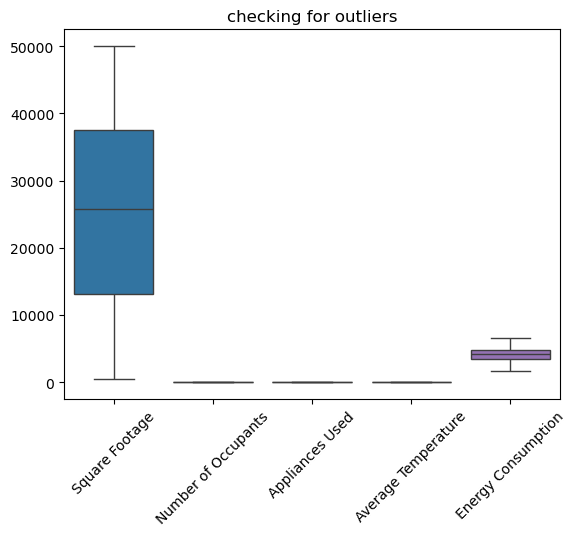

In [6]:
sns.boxplot(df)
plt.title('checking for outliers')
plt.xticks(rotation=45)
plt.show()

In [7]:
from collections import OrderedDict

stats = []

for i in df.columns:
    if df[i].dtype!= 'object':
        numeric_stats = OrderedDict({
            'Feature': i,
            'mean': df[i].mean(),
            'std_dev': df[i].std(),
            'min': df[i].min(),
            '25%': df[i].quantile(0.25),
            'Median': df[i].median(),
            '75%': df[i].quantile(0.75),
            'max': df[i].max(),
            'range': df[i].max() - df[i].min(),
            'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
            'skewness': df[i].skew(),
            'kurtosis': df[i].kurtosis(),
            'varance': df[i].var()
            


        })
        stats.append(numeric_stats)
    df.stats=pd.DataFrame(stats)

df.stats
    

,Feature,mean,std_dev,min,25%,Median,75%,max,range,IQR,skewness,kurtosis,varance
0,Square Footage,25500.527273,14236.955632,560.00,13203.750,25785.50,37536.75,49997.00,49437.00,24333.000,-0.009364,-1.170704,2.026909e+08
1,Number of Occupants,48.268182,29.127624,1.00,22.000,47.00,73.00,99.00,98.00,51.000,0.095382,-1.246361,8.484185e+02
2,Appliances Used,25.730000,14.116209,1.00,13.000,26.00,38.00,49.00,48.00,25.000,-0.047299,-1.192505,1.992673e+02
3,Average Temperature,22.559745,7.122357,10.05,16.365,22.81,28.76,34.99,24.94,12.395,-0.035257,-1.173093,5.072797e+01
4,Energy Consumption,4168.191273,924.278723,1683.95,3510.460,4189.69,4859.51,6530.60,4846.65,1349.050,-0.060156,-0.565316,8.542912e+05


In [8]:
# Converting Categorical Variables to Numerical Variables ---> Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Building Type'] = le.fit_transform(df['Building Type'])
df['Day of Week'] = le.fit_transform(df['Day of Week'])
df.sample(frac =1)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
632,2,31159,35,42,17.84,0,4208.74
212,1,29902,15,34,16.79,1,4741.16
444,2,31610,15,36,14.78,0,3926.61
683,1,13880,28,19,24.15,1,3733.24
574,1,1025,28,48,24.41,0,3719.19
...,...,...,...,...,...,...,...
66,0,6859,25,47,25.80,1,3403.93
825,1,11882,17,2,31.50,1,3146.62
1009,1,21030,90,35,12.96,0,5136.69
203,1,47827,44,23,30.84,1,5637.13


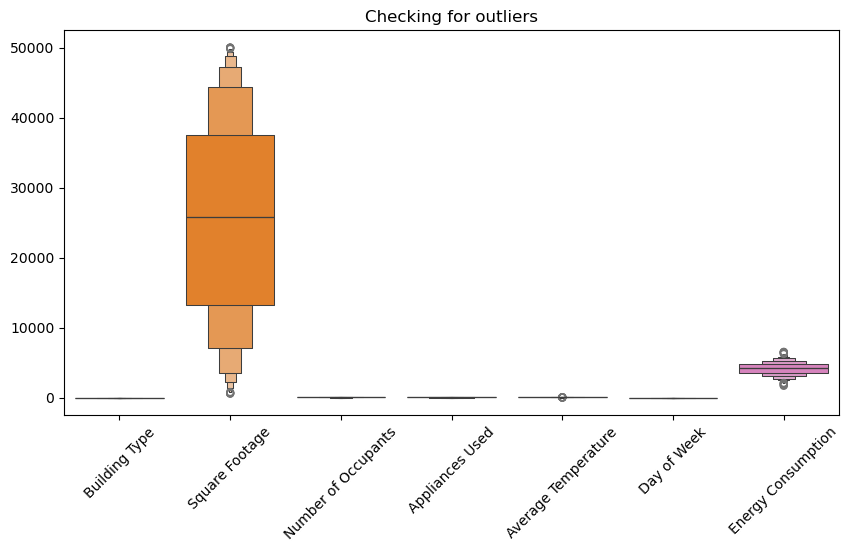

In [9]:
plt.figure(figsize=(10,5))
sns.boxenplot(data= df)
plt.xticks(rotation=45)
plt.title('Checking for outliers')
plt.show()

<Axes: >

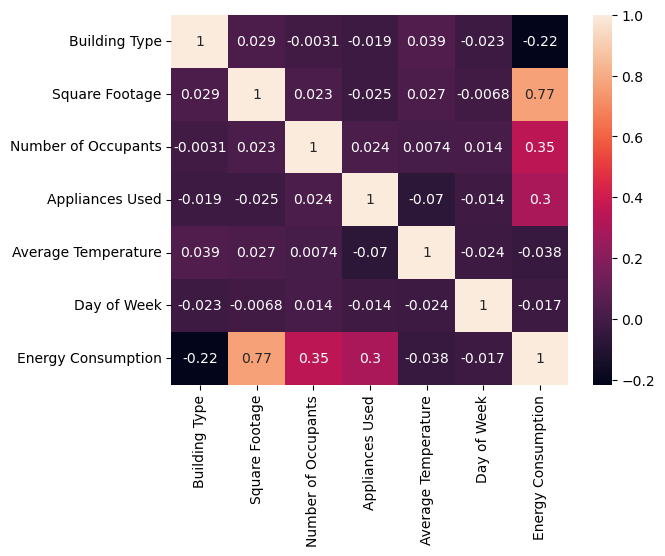

In [10]:
df.corr()['Energy Consumption'].sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)

In [13]:
# spliting the dataset into X and y
X = df.drop('Energy Consumption',axis = 1)
y = df['Energy Consumption']

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
#  Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RF = RandomForestRegressor()

# Training the model
RF.fit(X_train, y_train)

# Predicting on the test set
y_pred_RF = RF.predict(X_test)

r2_score(y_test, y_pred_RF)


0.9734875654969025

In [16]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

# Training the model
LR.fit(X_train, y_train)

# Predicting on the test set
y_pred_LR = LR.predict(X_test)

r2_score(y_test, y_pred_LR)

0.8558894689449239

In [17]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

# Training the model
DT.fit(X_train, y_train)

# Predicting on the test set

y_pred_DT = DT.predict(X_test)

r2_score(y_test, y_pred_DT)

0.919535088366399

In [18]:
# Ridge Regression Model
from sklearn.linear_model import Ridge

RR = Ridge()

# Training the model
RR.fit(X_train, y_train)

# Predicting on the test set
y_pred_RR = RR.predict(X_test)

r2_score(y_test, y_pred_RR)

0.8560159403691033

In [19]:
# Lasso Regression Model
from sklearn.linear_model import Lasso

LS = Lasso()

# Training the model
LS.fit(X_train, y_train)

# Predicting on the test set
y_pred_LS = LS.predict(X_test)

r2_score(y_test, y_pred_LS)

0.8560403238906485

In [ ]:
# Evaluating the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

In [26]:
print('R2 Score : ', r2_RF)
print('Mean absolute error : ',mse_RF)
print('Mean squared error : ', mae_RF)


R2 Score :  0.9734875654969025
Mean absolute error :  22136.891958533623
Mean squared error :  119.79462212121254
